In [ ]:
!pip install contextily geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 65.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import Point,Polygon

In [ ]:
milano = gpd.read_file('https://github.com/FilippoPietroNeri/datigpd/raw/main/ds964_nil_wm.zip')
sosta_turistici = pd.read_csv('https://raw.githubusercontent.com/FilippoPietroNeri/datigpd/main/sosta_turistici.csv', sep=';')

In [ ]:
sosta_turistici

In [46]:
milano

ID_NIL                                             NIL  Valido_dal  \
0       48  RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO  05/02/2020   
1       64                                          TRENNO  05/02/2020   
2       67                                        PORTELLO  05/02/2020   
3       81                                       BOVISASCA  05/02/2020   
4       84                                      PARCO NORD  05/02/2020   
..     ...                                             ...         ...   
83      68                                          PAGANO  05/02/2020   
84       2                                           BRERA  05/02/2020   
85      33                         ROGOREDO - SANTA GIULIA  05/02/2020   
86      17                                         ADRIANO  05/02/2020   
87      53                                     LORENTEGGIO  05/02/2020   

   Valido_al                        Fonte    Shape_Leng    Shape_Area  \
0    Vigente  Milano 2030 - PGT Approvato   8723.368714  2.406306e+06   
1    Vigente  Milano 2030 - PGT Approvato   3309.998800  4.896921e+05   
2    Vigente  Milano 2030 - PGT Approvato   3800.750663  9.096022e+05   
3    Vigente  Milano 2030 - PGT Approvato   7105.469715  1.578028e+06   
4    Vigente  Milano 2030 - PGT Approvato  11741.717005  1.532331e+06   
..       ...                          ...           ...           ...   
83   Vigente  Milano 2030 - PGT Approvato   5221.836696  1.289686e+06   
84   Vigente  Milano 2030 - PGT Approvato   5461.667196  1.637333e+06   
85   Vigente  Milano 2030 - PGT Approvato   6012.496435  1.200116e+06   
86   Vigente  Milano 2030 - PGT Approvato   9276.875747  2.433358e+06   
87   Vigente  Milano 2030 - PGT Approvato   8442.031660  2.644338e+06   

    OBJECTID                                           geometry  
0         89  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...  
1         90  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...  
2         91  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...  
3         92  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...  
4         93  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...  
..       ...                                                ...  
83       172  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...  
84       173  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...  
85       174  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...  
86       175  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...  
87       176  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...  

[88 rows x 9 columns]

1. Convertire il dataframe in un geodataframe

---



In [ ]:
geometry = [Point(xy) for xy in zip(sosta_turistici['LONG_X_4326'],sosta_turistici['LAT_Y_4326'])]
sosta_turistici_gdf = gpd.GeoDataFrame(sosta_turistici, crs="EPSG:4326", geometry=geometry)

In [34]:
sosta_turistici_gdf

id_amat tipo_sosta  via_id             localizzaz  num_stalli  \
0         1      BREVE    2103             VIA MARINA           5   
1         2      BREVE     704        PIAZZA CASTELLO           2   
2         5      BREVE     711        FORO BUONAPARTE           8   
3         9      BREVE     144   VIA FATEBENEFRATELLI           1   
4         6      BREVE    1052              VIA MANIN           3   
5         8      BREVE    5090              VIA OLONA           3   
6        15      BREVE     647        VIA SAN VITTORE           1   
7         4      BREVE    6219               VIA VICO           8   
8         3      BREVE    6174       VIA XX SETTEMBRE           4   
9         7      BREVE    6162  PIAZZA GIOVINE ITALIA           2   
10       12      BREVE     230            VIA MANZONI           2   
11     1011      BREVE    4375            CHIARAVALLE           3   
12     1004      LUNGA    2106          PORTA VENEZIA          10   
13     1006      LUNGA    2715        REPUBBLICA M3 S          10   
14     1015      LUNGA    3140         PORTA VITTORIA          20   
15     1005      LUNGA    4201            CASTELBARCO           3   
16     1003      LUNGA    5353           FAMAGOSTA M2           6   
17     1001      LUNGA    6088              PAGANO M1          29   
18     1016      LUNGA    6624                 TRENNO          35   
19     1002      LUNGA    7234         MONUMENTALE M5           8   
20     1007      LUNGA    1117        GARIBALDI M2 M5           3   
21     1013      LUNGA    1188         VIA VALTELLINA          14   
22     1008      LUNGA    1441             BIGNAMI M5           6   
23     1012      LUNGA    1627             VIA CHIESE           3   

          tipologia                            note regole costo_ora  \
0         su strada                             NaN   8-24         0   
1         su strada                             NaN   0-24         0   
2         su strada                             NaN   0-24         0   
3         su strada                             NaN   8-24         0   
4         su strada                             NaN   8-24         0   
5         su strada                             NaN   8-24         0   
6         su strada                             NaN   9-18         0   
7         su strada                             NaN   0-24         0   
8         su strada                             NaN   8-20         0   
9         su strada                             NaN   8-24         0   
10        su strada                             NaN   8-24         0   
11        su strada           solo salita e discesa   0-24         -   
12        su strada                             NaN   8-24       8 €   
13        su strada                             NaN   8-24       8 €   
14  area parcheggio                             NaN   8-24       8 €   
15        su strada                      non attiva    NaN         -   
16        su strada                             NaN   0-24         -   
17  area parcheggio  chiusa la domenica per mercato   8-20       8 €   
18      area chiusa                             NaN   8-24         -   
19        su strada                             NaN   0-20       8 €   
20        su strada                             NaN   0-24         -   
21  area parcheggio                             NaN   0-24       8 €   
22        su strada                             NaN   8-20       8 €   
23  area parcheggio                             NaN   0-24         -   

    num_prog provenienza  LONG_X_4326  LAT_Y_4326  \
0          1      dentro     9.198329   45.470708   
1          2      dentro     9.180215   45.471826   
2          2      dentro     9.181249   45.472650   
3          3      dentro     9.188725   45.473083   
4          4      dentro     9.197256   45.475864   
5          8      dentro     9.172904   45.461301   
6          9      dentro     9.170714   45.463115   
7         10      dentro     9.167533   45.462205   


2. Visualizzare i dati su una mappa di Milano. Fare in modo che i punti siano colorati in rosso

---



In [ ]:
milano3857 = milano.to_crs(3857)
sosta3857 = sosta_turistici_gdf.to_crs(3857)

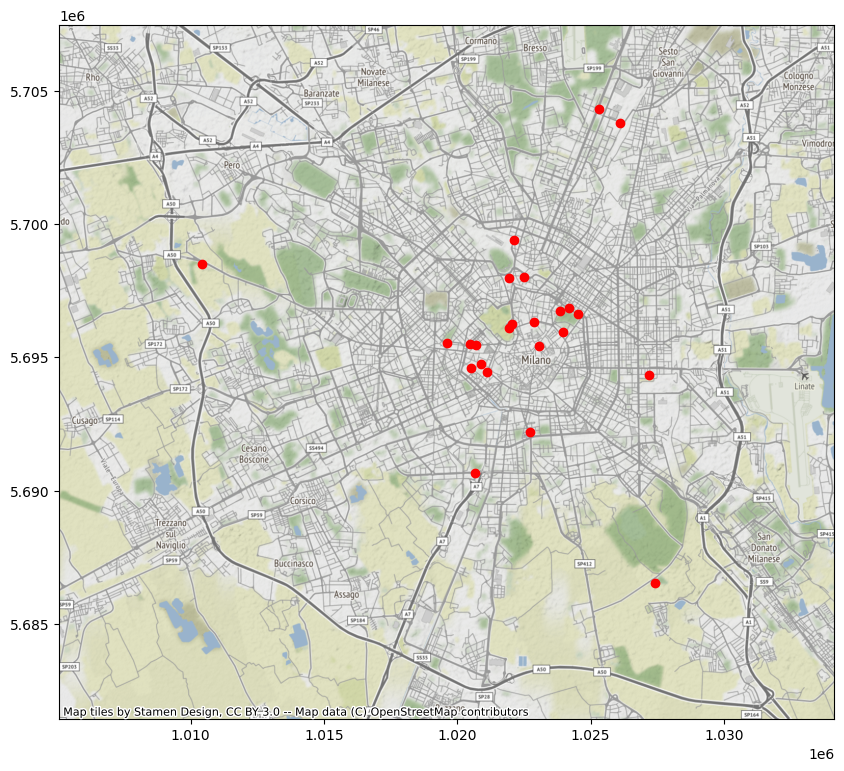

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sosta3857.plot(ax=ax, color='red')
milano3857.plot(ax=ax,facecolor='none', edgecolor='none')
ctx.add_basemap(ax=ax)

3. Visualizzare sulla mappa anche i confini dei quartieri di Milano. Colorare i confini di nero

---



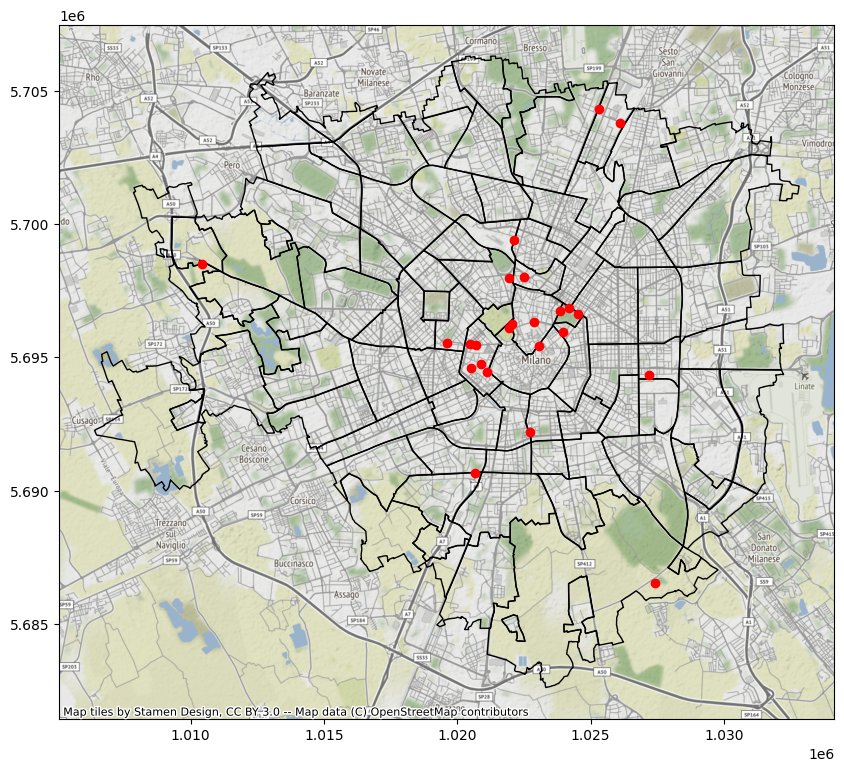

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
milano3857.plot(ax=ax,facecolor='none')
sosta3857.plot(ax=ax, color='red')
ctx.add_basemap(ax=ax)

4. Permettere all'utente di inserire la localizzazione di un parcheggio e di avere il nome del quartiere che ha al suo interno quel parcheggio. Visualizzare poi la mappa del quartiere con un marker nella posizione del parcheggio. Dare un opportuno messaggio di errore se il parcheggio non esiste.

---



Inserisci la localizzazione: TRENNO
28    PARCO BOSCO IN CITTA'
Name: NIL, dtype: object


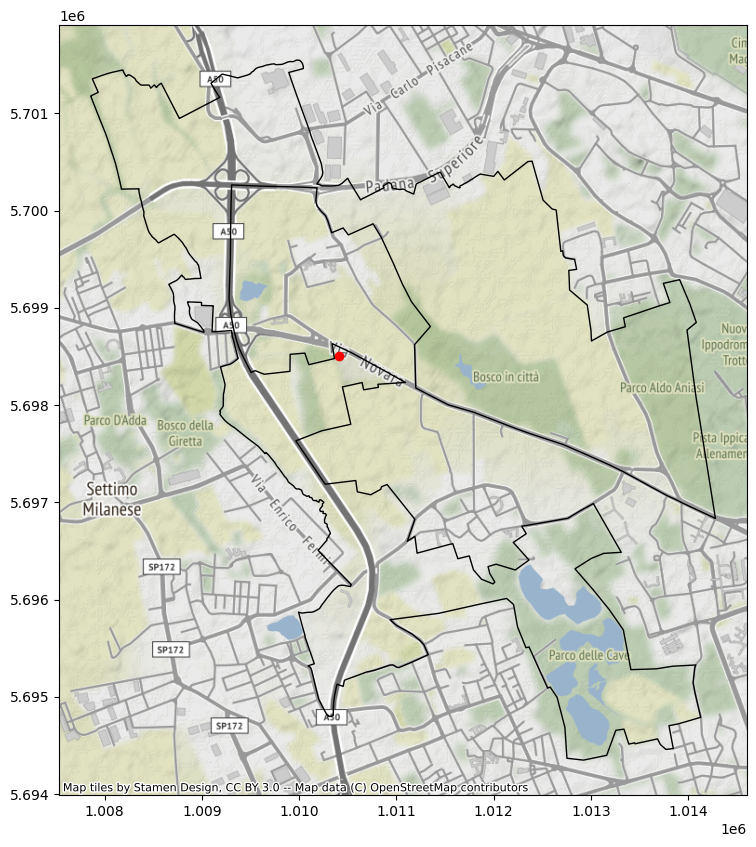

In [ ]:
localizzazione = input('Inserisci la localizzazione: ')

result = sosta_turistici_gdf[sosta_turistici_gdf['localizzaz'] == localizzazione]

if len(result) > 0:
  quartiere = milano[milano.contains(result.geometry.squeeze())]
  if not quartiere.empty:
    print(quartiere['NIL'])
    fig,ax = plt.subplots(figsize=(10,10))
    quartiere.to_crs(3857).plot(ax=ax,facecolor='none')
    result.to_crs(3857).plot(ax=ax, color='red')
    ctx.add_basemap(ax=ax)
  else:
    print('Il parcheggio in questo quartiere non esiste!')
else:
  print('Non esiste nessun parcheggio con questa localizzazione!')


5. Permettere all'utente di inserire la propria posizione ed una distanza e di avere la lista dei parcheggi che si trovano a meno di quella distanza dalla posizione dell'utente. Visualizzare poi la mappa di Milano con i parcheggi trovati e i confini dei quartieri in cui si trovano. Se non ci sono parcheggi, segnalarlo con un messaggio opportuno.

---



In [45]:
latitudine = float(input('Inserisci la longitudine'))
longitudine = float(input('Inserisci la latitudine'))
distanza = float(input('Inserisci una distanza massima: '))

userPoint = gpd.GeoSeries(Point(longitudine,latitudine))

sosteVicine = sosta_turistici_gdf[sosta_turistici_gdf.distance(userPoint.iloc[0]) <= distanza]

sosteVicine

Inserisci una distanza massima: 5


<ipython-input-45-0252445bfb57>:7: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sosteVicine = sosta_turistici_gdf[sosta_turistici_gdf.distance(userPoint.iloc[0]) <= distanza]


id_amat tipo_sosta  via_id             localizzaz  num_stalli  \
0         1      BREVE    2103             VIA MARINA           5   
1         2      BREVE     704        PIAZZA CASTELLO           2   
2         5      BREVE     711        FORO BUONAPARTE           8   
3         9      BREVE     144   VIA FATEBENEFRATELLI           1   
4         6      BREVE    1052              VIA MANIN           3   
5         8      BREVE    5090              VIA OLONA           3   
6        15      BREVE     647        VIA SAN VITTORE           1   
7         4      BREVE    6219               VIA VICO           8   
8         3      BREVE    6174       VIA XX SETTEMBRE           4   
9         7      BREVE    6162  PIAZZA GIOVINE ITALIA           2   
10       12      BREVE     230            VIA MANZONI           2   
11     1011      BREVE    4375            CHIARAVALLE           3   
12     1004      LUNGA    2106          PORTA VENEZIA          10   
13     1006      LUNGA    2715        REPUBBLICA M3 S          10   
14     1015      LUNGA    3140         PORTA VITTORIA          20   
15     1005      LUNGA    4201            CASTELBARCO           3   
16     1003      LUNGA    5353           FAMAGOSTA M2           6   
17     1001      LUNGA    6088              PAGANO M1          29   
18     1016      LUNGA    6624                 TRENNO          35   
19     1002      LUNGA    7234         MONUMENTALE M5           8   
20     1007      LUNGA    1117        GARIBALDI M2 M5           3   
21     1013      LUNGA    1188         VIA VALTELLINA          14   
22     1008      LUNGA    1441             BIGNAMI M5           6   
23     1012      LUNGA    1627             VIA CHIESE           3   

          tipologia                            note regole costo_ora  \
0         su strada                             NaN   8-24         0   
1         su strada                             NaN   0-24         0   
2         su strada                             NaN   0-24         0   
3         su strada                             NaN   8-24         0   
4         su strada                             NaN   8-24         0   
5         su strada                             NaN   8-24         0   
6         su strada                             NaN   9-18         0   
7         su strada                             NaN   0-24         0   
8         su strada                             NaN   8-20         0   
9         su strada                             NaN   8-24         0   
10        su strada                             NaN   8-24         0   
11        su strada           solo salita e discesa   0-24         -   
12        su strada                             NaN   8-24       8 €   
13        su strada                             NaN   8-24       8 €   
14  area parcheggio                             NaN   8-24       8 €   
15        su strada                      non attiva    NaN         -   
16        su strada                             NaN   0-24         -   
17  area parcheggio  chiusa la domenica per mercato   8-20       8 €   
18      area chiusa                             NaN   8-24         -   
19        su strada                             NaN   0-20       8 €   
20        su strada                             NaN   0-24         -   
21  area parcheggio                             NaN   0-24       8 €   
22        su strada                             NaN   8-20       8 €   
23  area parcheggio                             NaN   0-24         -   

    num_prog provenienza  LONG_X_4326  LAT_Y_4326  \
0          1      dentro     9.198329   45.470708   
1          2      dentro     9.180215   45.471826   
2          2      dentro     9.181249   45.472650   
3          3      dentro     9.188725   45.473083   
4          4      dentro     9.197256   45.475864   
5          8      dentro     9.172904   45.461301   
6          9      dentro     9.170714   45.463115   
7         10      dentro     9.167533   45.462205   


6. Visualizzare i nomi dei quartieri che non hanno parcheggi al loro interno. Visualizzarli su una mappa con i confini colorati di grigio.

---



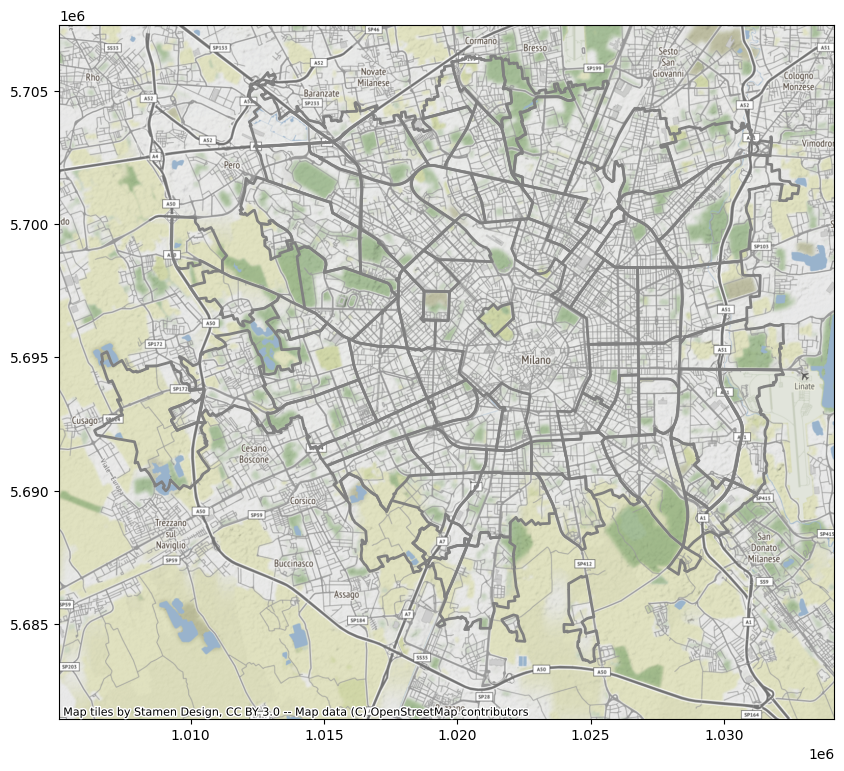

In [ ]:
senzasoste = milano[~milano.intersects(sosta_turistici_gdf.unary_union)]
fig, ax = plt.subplots(figsize=(10, 10))
milano3857.plot(ax=ax,facecolor='none', edgecolor='none')
senzasoste.to_crs(3857).plot(ax=ax,facecolor='none', edgecolor='gray', linewidth=2)
ctx.add_basemap(ax=ax)

7. Visualizzare i quartieri di Milano colorati in base al numeri di stalli che contengono. Utilizzare diverse gradazioni di verde e permettere che si veda in trasparenza la mappa dietro i quartieri colorati. Visualizzare anche la legenda..

---

